In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
path = "/content/drive/My Drive/Images"
annot = "/content/drive/My Drive/Airplanes_Annotations"

airplane_148.jpg


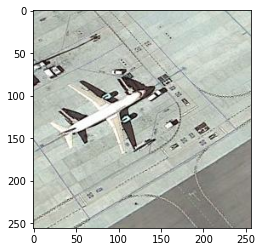

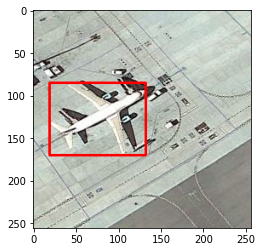

In [3]:
Index=148
filename = "airplane_"+str(Index)+".jpg"
print(filename)
img = cv2.imread(os.path.join(path,filename))
df = pd.read_csv(os.path.join(annot,filename.replace(".jpg",".csv")))
plt.imshow(img)
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
plt.figure()
plt.imshow(img)

In [4]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

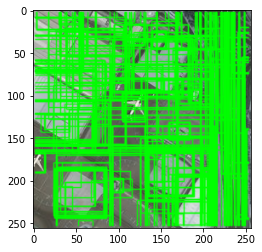

In [5]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [6]:
def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [7]:
train_images=[]
train_labels=[]

In [8]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)   # setting given image as base image
            ss.switchToSelectiveSearchFast()     # running selective search on bae image 
            ssresults = ss.process()     # processing to get the outputs
            imout = image.copy()   
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
                        if counter < 30:       # getting only 30 psoitive examples
                            if iou > 0.70:     # IoU or being positive is 0.7
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1              # to insure we have collected all psotive examples
                        if falsecounter <30:      # 30 negatve examples are allowed only
                            if iou < 0.3:         # IoU or being negative is 0.3
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1             #to ensure we have collected all negative examples
                    if fflag == 1 and bflag == 1:  
                        print("inside")
                        flag = 1        # to signal the complition of data extaction from a particular image
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_023.jpg
1 airplane_289.jpg
inside
2 airplane_207.jpg
3 airplane_302.jpg
4 airplane_131.jpg
5 airplane_079.jpg
6 airplane_217.jpg
7 airplane_141.jpg
8 airplane_138.jpg
10 airplane_204.jpg
11 airplane_059.jpg
12 airplane_258.jpg
13 airplane_244.jpg
14 airplane_058.jpg
16 airplane_009.jpg
17 airplane_069.jpg
18 airplane_262.jpg
19 airplane_253.jpg
20 airplane_104.jpg
21 airplane_065.jpg
22 airplane_165.jpg
24 airplane_275.jpg
25 airplane_061.jpg
26 airplane_051.jpg
27 airplane_063.jpg
28 airplane_135.jpg
29 airplane_225.jpg
inside
30 airplane_103.jpg
31 airplane_082.jpg
33 airplane_227.jpg
34 airplane_124.jpg
35 airplane_136.jpg
inside
36 airplane_018.jpg
37 airplane_100.jpg
38 airplane_174.jpg
39 airplane_247.jpg
40 airplane_150.jpg
41 airplane_091.jpg
42 airplane_263.jpg
43 airplane_171.jpg
44 airplane_049.jpg
45 airplane_095.jpg
46 airplane_153.jpg
47 airplane_148.jpg
48 airplane_211.jpg
49 airplane_185.jpg
50 airplane_107.jpg
51 airplane_267.jpg
52 airplane_219.jpg
54 airpl

In [9]:
X_new = np.array(train_images)
Y_new = np.array(train_labels)

In [10]:
from keras.layers import Dense
from keras import Model
from keras import optimizers

In [11]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
for layer in vgg.layers[:-2]:
  layer.trainable = False
x = vgg.get_layer('fc2')
last_output =  x.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_output)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

553467904/553467096 [==============================] - 8s 0us/step


In [12]:
model.summary()
model.fit(X_new,Y_new,batch_size = 64,epochs = 3, verbose = 1,validation_split=.05,shuffle = True)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
svm_image = [];
svm_label = [];

In [14]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3]) 
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                svm_image.append(resized)
                svm_label.append([0,1])
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if falsecounter <5:
                            if iou < 0.3:
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                svm_image.append(resized)
                                svm_label.append([1,0])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_023.jpg
1 airplane_289.jpg
2 airplane_207.jpg
3 airplane_302.jpg
4 airplane_131.jpg
5 airplane_079.jpg
6 airplane_217.jpg
7 airplane_141.jpg
8 airplane_138.jpg
10 airplane_204.jpg
11 airplane_059.jpg
12 airplane_258.jpg
13 airplane_244.jpg
14 airplane_058.jpg
16 airplane_009.jpg
17 airplane_069.jpg
18 airplane_262.jpg
19 airplane_253.jpg
20 airplane_104.jpg
21 airplane_065.jpg
22 airplane_165.jpg
24 airplane_275.jpg
25 airplane_061.jpg
26 airplane_051.jpg
27 airplane_063.jpg
28 airplane_135.jpg
29 airplane_225.jpg
30 airplane_103.jpg
31 airplane_082.jpg
33 airplane_227.jpg
34 airplane_124.jpg
35 airplane_136.jpg
36 airplane_018.jpg
37 airplane_100.jpg
38 airplane_174.jpg
39 airplane_247.jpg
40 airplane_150.jpg
41 airplane_091.jpg
42 airplane_263.jpg
43 airplane_171.jpg
44 airplane_049.jpg
45 airplane_095.jpg
46 airplane_153.jpg
47 airplane_148.jpg
48 airplane_211.jpg
49 airplane_185.jpg
50 airplane_107.jpg
51 airplane_267.jpg
52 airplane_219.jpg
54 airplane_274.jpg
55 airpla

In [20]:
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [17]:
hist_final = final_model.fit(np.array(svm_image),np.array(svm_label),batch_size=32,epochs = 20,verbose = 1,shuffle = True,validation_split = 0.05)

Epoch 1/20
167/167 [==============================] - 46s 275ms/step - loss: 0.6297 - accuracy: 0.7327 - val_loss: 0.5954 - val_accuracy: 0.7153
Epoch 2/20
167/167 [==============================] - 41s 248ms/step - loss: 0.5105 - accuracy: 0.7790 - val_loss: 0.6879 - val_accuracy: 0.7011
Epoch 3/20
167/167 [==============================] - 41s 247ms/step - loss: 0.4440 - accuracy: 0.8148 - val_loss: 0.6112 - val_accuracy: 0.7082
Epoch 4/20
167/167 [==============================] - 41s 248ms/step - loss: 0.4179 - accuracy: 0.8284 - val_loss: 0.6279 - val_accuracy: 0.7011
Epoch 5/20
167/167 [==============================] - 41s 247ms/step - loss: 0.3613 - accuracy: 0.8505 - val_loss: 0.7170 - val_accuracy: 0.7260
Epoch 6/20
167/167 [==============================] - 41s 247ms/step - loss: 0.3520 - accuracy: 0.8532 - val_loss: 0.6872 - val_accuracy: 0.7224
Epoch 7/20
167/167 [==============================] - 41s 247ms/step - loss: 0.3151 - accuracy: 0.8708 - val_loss: 0.7083 - val_ac

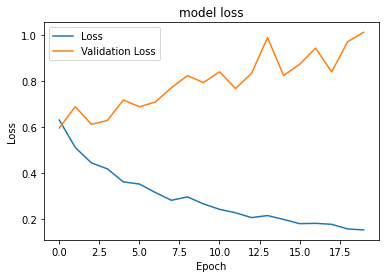

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

0 [[ 0.15454328 -0.0826807 ]]
1 [[0.8072327 0.3466994]]
2 [[0.89684093 0.1869618 ]]
3 [[0.25927383 1.1288912 ]]
4 [[1.6895107  0.84670913]]
5 [[0.79185957 0.16459647]]
6 [[1.3320384 0.4823088]]
7 [[0.6426921  0.07637969]]
8 [[0.5516837  0.04134458]]
9 [[0.5190668 0.7923652]]
10 [[0.8341091 0.2166925]]
11 [[0.70866996 0.30726233]]
12 [[0.5229308  0.09026039]]
13 [[-0.02324164  1.404478  ]]
14 [[0.08993113 0.30458364]]
15 [[ 0.55748737 -0.15149151]]
16 [[ 0.43551916 -0.06620957]]
17 [[-0.07134771 -0.43667847]]
18 [[0.91801405 0.16504979]]
19 [[0.78973335 0.02027383]]
20 [[-0.33580446  1.6486322 ]]
21 [[-0.01009879  0.08618724]]
22 [[0.6917021  0.14222728]]
23 [[0.663978  0.7896921]]
24 [[ 0.02254517 -0.25839725]]
25 [[0.82901037 0.80470634]]
26 [[0.38517454 0.07499325]]
27 [[0.5622063  0.06712192]]
28 [[0.7102537 0.2186122]]
29 [[0.45657358 0.30021226]]
30 [[0.17756093 0.49355006]]
31 [[ 0.07793538 -0.1457085 ]]
32 [[0.5376241 0.7414596]]
33 [[0.86301816 0.08955729]]
34 [[0.6360043  0.45

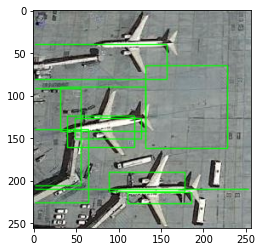

In [23]:
image = cv2.imread(os.path.join(path,'airplane_050.jpg'))
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

imOut = image.copy()
boxes = []
count = 0
for e,result in enumerate(ssresults):
  if e < 50:
    x,y,w,h = result
    timage = imout[x:x+w,y:y+h]
    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
    resized = np.expand_dims(resized,axis = 0)
    out = final_model.predict(resized)
    print(e,out)
    if(out[0][0]<out[0][1]):
      boxes.append([x,y,w,h])
      count+=1

for box in boxes:
    x, y, w, h = box
    print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)